## Import CSV

In [19]:
import pandas
def read_csv(filename,folder):
    folder=folder+"/"+filename+".csv"
    return pandas.read_csv(folder,encoding='ISO-8859-1')

In [40]:
#folder="/Users/mac/Desktop/bigdataanalysis/test"
folder="/nfs/Workspace"
data=read_csv(filename="result_1103nan",folder=folder)
data = data.fillna(method='ffill')
data = data.sort_values(by="Date",ascending=False)
data.tail()

,Date,vfx,vix,vbx,rom,vmt,rwm,dog,psh,spx,gld,uso
4,2007-01-09,99.326218,11.91,6.442942,NaN,NaN,NaN,208.540222,99.986458,2177.679932,60.849998,378.399994
3,2007-01-08,99.379700,12.00,6.442942,NaN,NaN,NaN,208.407623,99.970459,2178.800049,60.480000,379.920013
2,2007-01-05,99.127716,12.14,6.442942,NaN,NaN,NaN,208.639679,100.162170,2173.290039,60.169998,382.640015
1,2007-01-04,99.730949,11.51,6.455796,NaN,NaN,NaN,207.214310,99.331474,2186.600098,61.650002,379.119995
0,2007-01-03,99.608803,12.04,6.436509,NaN,NaN,NaN,207.181107,99.698906,2183.919922,62.279999,395.200012


In [21]:
#data2 = read_csv(filename="Result2",folder=folder)
#data= pandas.merge(data,data2,on=['Date'],how = 'outer')
#data = data.sort_values(by="Date",ascending=True)


In [22]:
#data = data.fillna(method='bfill')
#data = data.rename(columns = {'Unemployment Rate in the United States (DISCONTINUED)':'Unemployment_Rate','Consumer Price Index for All Urban Consumers: All Items in U.S. City Average':'CPI'})
#data.head()

## Visualize Data

In [23]:
from matplotlib import pyplot
def plot_data(dataset,groups):
    i = 1
    pyplot.figure()
    values = dataset.values
    for group in groups:
    	pyplot.subplot(len(groups), 1, i)
    	pyplot.plot(values[:, group])
    	pyplot.title(dataset.columns[group], y=0.5, loc='right')
    	i += 1
    pyplot.show()

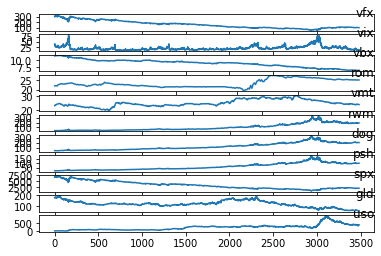

In [24]:
plot_data(data,groups=list(range(1,12)))

## Data Summary

In [25]:
data.describe()

,vfx,vix,vbx,rom,vmt,rwm,dog,psh,spx,gld,uso
count,3483.000000,3483.000000,3483.000000,251.000000,881.000000,3468.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000
mean,156.000406,19.934169,8.923687,23.358095,25.191651,104.281484,129.671743,63.919065,3452.470841,121.681995,241.446316
std,68.477523,9.800979,1.312441,2.052146,2.347998,69.830281,68.506875,35.175604,1533.291511,27.402888,169.317250
min,49.903458,9.140000,6.372207,19.612000,19.896000,30.959999,42.000000,19.209999,1095.040039,60.169998,17.040001
25%,99.328823,13.515000,7.958967,21.610001,23.590000,46.412997,69.443054,32.976210,2181.414917,108.589996,95.120003
50%,144.866333,16.950001,9.086428,22.702999,24.659866,68.899654,106.643288,50.934517,3198.570068,120.949997,261.279999
75%,208.073540,23.130000,9.819468,25.298821,27.359310,155.523609,193.874573,95.632324,4615.409912,137.070000,304.079987
max,330.062653,82.690002,11.750479,27.490999,30.474449,353.667328,348.737610,181.070267,7358.490234,193.889999,939.840027


## Independent and identically distributed (I.I.D.) Testing

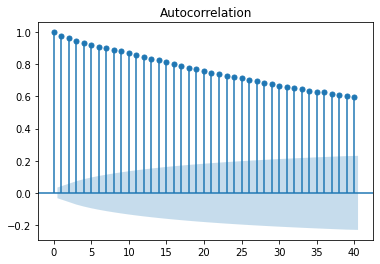

In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(data['vix'].values, lags=40)
plt.show()

## Histogram

<AxesSubplot:ylabel='Frequency'>

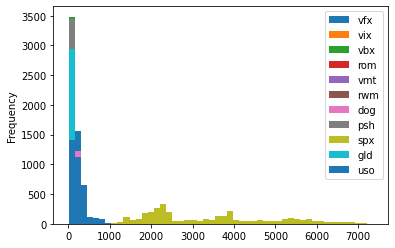

In [27]:
data.plot(kind="hist",bins=50)

## Normal Test 

In [28]:
from scipy import stats
print(stats.shapiro(data['vfx'].values))
# print(stats.shapiro(data['VBMFX'].values))

ShapiroResult(statistic=0.9248300194740295, pvalue=1.1945661630515947e-38)


## *** LSTM ***

In [29]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def Standard_MinMax(data):
    sc = MinMaxScaler(feature_range = (0, 1))
    return sc.fit_transform(data.reshape(-1,1))

In [30]:
# folder="/Users/mac/Desktop/bigdataanalysis/test"
# data=read_csv(filename="Result",folder=folder)
del data['Date']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
scaled

array([[0.899976  , 0.39265805, 0.9590056 , ..., 0.90043021, 0.86770863,
        0.00889683],
       [0.91311136, 0.38681168, 0.96458373, ..., 0.91351409, 0.86172595,
        0.00927612],
       [0.90011869, 0.42338542, 0.97016168, ..., 0.90057553, 0.86718521,
        0.01004551],
       ...,
       [0.17570103, 0.04078858, 0.01315199, ..., 0.17214953, 0.        ,
        0.39618553],
       [0.17785421, 0.03222298, 0.01554208, ..., 0.17427457, 0.01106793,
        0.39237103],
       [0.17741822, 0.03942895, 0.01195597, ..., 0.17384666, 0.01577924,
        0.40979627]])

## Series to Supervised

In [31]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [32]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t)
1,0.899976,0.392658,0.959006,0.306892,0.329065,0.006445,0.011997,0.009514,0.900430,0.867709,...,0.386812,0.964584,0.320853,0.350808,0.005144,0.011150,0.008279,0.913514,0.861726,0.009276
2,0.913111,0.386812,0.964584,0.320853,0.350808,0.005144,0.011150,0.008279,0.913514,0.861726,...,0.423385,0.970162,0.299911,0.342300,0.006322,0.011834,0.009576,0.900576,0.867185,0.010046
3,0.900119,0.423385,0.970162,0.299911,0.342300,0.006322,0.011834,0.009576,0.900576,0.867185,...,0.329164,0.970162,0.395101,0.375386,0.003254,0.006977,0.005313,0.939913,0.888798,0.011541
4,0.939596,0.329164,0.970162,0.395101,0.375386,0.003254,0.006977,0.005313,0.939913,0.888798,...,0.317063,0.966443,0.399162,0.381436,0.002386,0.005803,0.004943,0.943277,0.885283,0.010912
5,0.942951,0.317063,0.966443,0.399162,0.381436,0.002386,0.005803,0.004943,0.943277,0.885283,...,0.250306,0.962724,0.451453,0.415278,0.000310,0.002575,0.002718,0.964448,0.885956,0.011747


In [33]:
# pred = {'VFINX':13}
# reframed = pandas.concat([reframed.iloc[:,0:12],reframed.iloc[:,pred['VFINX']]],axis=1)
reframed.head()
# reframed.shape

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t)
1,0.899976,0.392658,0.959006,0.306892,0.329065,0.006445,0.011997,0.009514,0.900430,0.867709,...,0.386812,0.964584,0.320853,0.350808,0.005144,0.011150,0.008279,0.913514,0.861726,0.009276
2,0.913111,0.386812,0.964584,0.320853,0.350808,0.005144,0.011150,0.008279,0.913514,0.861726,...,0.423385,0.970162,0.299911,0.342300,0.006322,0.011834,0.009576,0.900576,0.867185,0.010046
3,0.900119,0.423385,0.970162,0.299911,0.342300,0.006322,0.011834,0.009576,0.900576,0.867185,...,0.329164,0.970162,0.395101,0.375386,0.003254,0.006977,0.005313,0.939913,0.888798,0.011541
4,0.939596,0.329164,0.970162,0.395101,0.375386,0.003254,0.006977,0.005313,0.939913,0.888798,...,0.317063,0.966443,0.399162,0.381436,0.002386,0.005803,0.004943,0.943277,0.885283,0.010912
5,0.942951,0.317063,0.966443,0.399162,0.381436,0.002386,0.005803,0.004943,0.943277,0.885283,...,0.250306,0.962724,0.451453,0.415278,0.000310,0.002575,0.002718,0.964448,0.885956,0.011747


## Data Split

In [34]:
train = reframed.values[:5000,:]
test = reframed.values[5000:5051,:]
train_X, train_y = train[:, :-1], train[:, -1]
test_X , test_y  = test[:, :-1], test[:, -1]
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((250, 21), (250,), (0, 21), (0,))

In [35]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X  = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape


((250, 1, 21), (250,), (0, 1, 21), (0,))

## LSTM

In [36]:
import keras
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                14400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 14,451
Trainable params: 14,451
Non-trainable params: 0
_________________________________________________________________


## Training

In [37]:
history = model.fit(train_X, train_y, epochs=100, 
                    batch_size=128, validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)

Epoch 1/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0055
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 4.6212e-04
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 7.1413e-04
Epoch 4/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0020
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0836e-04
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 4.2418e-04
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 5.3360e-04
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 7.4228e-04
Epoch 10/100
2/2 [==============================] - 0s 35ms/step - loss: 6.5174e-04
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 3.5154e-04
Epoch 12/100
2/2 [==============================] - 0s 6ms/step - loss: 1.5263e-04
Epoch 13/100
2/2 [===

## Plot Loss Curve

Populating the interactive namespace from numpy and matplotlib


KeyError: 'val_loss'

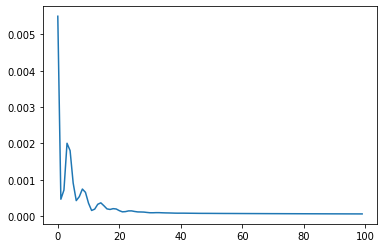

In [39]:
%pylab inline
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
test_X.shape

## Model Predict

In [ ]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
yhat.shape, test_X.shape
# yhat

## Invert scaling for forecast

In [ ]:
pred = {'VFINX': 2}
inv_yhat = concatenate((yhat, numpy.delete(test_X, pred['VFINX'], axis=1)), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat

## Invert scaling for actual

In [ ]:
real = test_y.reshape((len(test_y), 1))
inv_y = concatenate((real, numpy.delete(test_X, pred['VFINX'], axis=1)), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y

# RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
inv_y = np.cumprod(inv_y+1)
inv_yhat = np.cumprod(inv_yhat+1)

## Predict vs Real

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(inv_y, color = 'red', label = 'Real')
plt.plot(inv_yhat, color = 'blue', label = 'Predict')
plt.title('Real vs Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()